<a href="https://colab.research.google.com/github/KezhenLi/Homework3/blob/main/homework3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from numpy import ones,copy,cos,tan,pi,linspace,sqrt
from pylab import plot, show, xlabel, ylabel, title

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


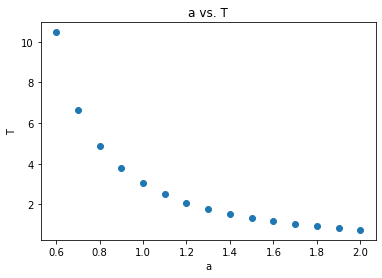

In [34]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

m = 1
N = 20
def T(a):
    x, w = gaussxwab(N, 0, a)
    integral = 0.0
    for i in range(N):
        integral += sqrt(8) * w[i] / sqrt(a ** 4 - x[i] ** 4)
    return integral

a = linspace(0.1, 2, N)
plot(a, T(a), 'o')
xlabel("a")
ylabel("T")
title("a vs. T")
show()
